## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

## Train model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [3]:
def linear_model_gradient_descent(x_train, y_train, learning_rate=1e-4, iteration=100, loss_function="MSE"):
    #Random initialize the weights, intercepts of the linear model
    weight = np.random.normal(0, np.var(x_train), x_train.ndim+1)
    
    loss = []
    
    for i in range(iteration):
        #Feed foward the training data into the model, get the output prediction
        y_pred = sum([weight[0], weight[1]*x_train]) 
        
        #Calculating training loss by Mean Square Error of predcition and ground truth data
        error = y_train - y_pred
        n = x_train.shape[0]
        loss.append(sum(error**2)/n)
        
        #Calculating the gradients
        gradient = [(-2)*sum(error)/n, (-2)*sum(error*x_train)/n]
        
        #Updating the weights and intercepts by the gradients * learning rate 
        weight[0] = weight[0] - gradient[0]*learning_rate
        weight[1] = weight[1] - gradient[1]*learning_rate
    
    #return the values of the least weights and loss of each iteration
    return loss, weight

1. (15%) Plot the learning curve of the training, you should find that loss decreases after a few iterations (x-axis=iteration, y-axis=loss, Matplotlib or other plot tools is
available to use)

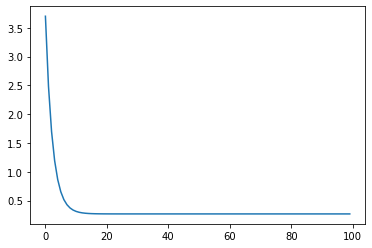

In [10]:
model = linear_model_gradient_descent(x_train, y_train, learning_rate=1e-1, iteration=100, loss_function="mse")
plt.plot(model[0])

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

2. (15%) What’s the Mean Square Error of your prediction and ground truth
(prediction=model(x_test), ground truth=y_test)


In [8]:
train_weight = model[1]
y_pred = sum([train_weight[0], train_weight[1]*x_test]) 
mse = sum((y_test - y_pred)**2)/y_test.shape[0]
print("Mean Square Error="+str(mse))

Mean Square Error=0.06870297322189324


3. (15%) What’re the weights and intercepts of your linear model?

In [9]:
print("weight="+str(train_weight[1])+" ;intercept="+str(train_weight[0]))

weight=0.8179703769483088 ;intercept=0.7845650819708999


4. (10%) What’s the difference between Gradient Descent, Mini-Batch Gradient
Descent, and Stochastic Gradient Descent?

Gradient Descent calculates the partial differential of loss function within all data points given, whereas Mini-Batch Gradient Descent is given some data points, which we call it "batch", and Stochastic Gradient Descent just given one data point every time. Thererfore, calculating time of each iteration is Gradient Descent > Mini-Batch Gradient Descent > Stochastic Gradient Descent, but the speed of the convergence is Gradient Descent > Mini-Batch Gradient Descent > Stochastic Gradient Descent.